In [60]:
import sys
import pandas as pd
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
sys.path.append('/home/chuan/PycharmProjects/mercedes-kaggle/')

In [3]:
from utils.data_io import load_train

In [11]:
df = load_train()

In [12]:
df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [6]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_ohe = pd.get_dummies(df, columns=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']).drop("ID", axis=1)
x = df_ohe.drop('y', axis=1)
y = df_ohe['y'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=31415)

In [46]:
def evaluate_result(ground_truth, prediction):
    print("MSE:", mean_squared_error(ground_truth, prediction))
    print("R2:", r2_score(ground_truth, prediction))
    to_plot = pd.DataFrame()
    to_plot['ground_truth'] = ground_truth
    to_plot['prediction'] = prediction
    to_plot.plot.scatter(x='ground_truth', y='prediction', figsize=[15,6])
    

## Linear

MSE: 5.273564049626274e+24
R2: -3.5364972546526628e+22


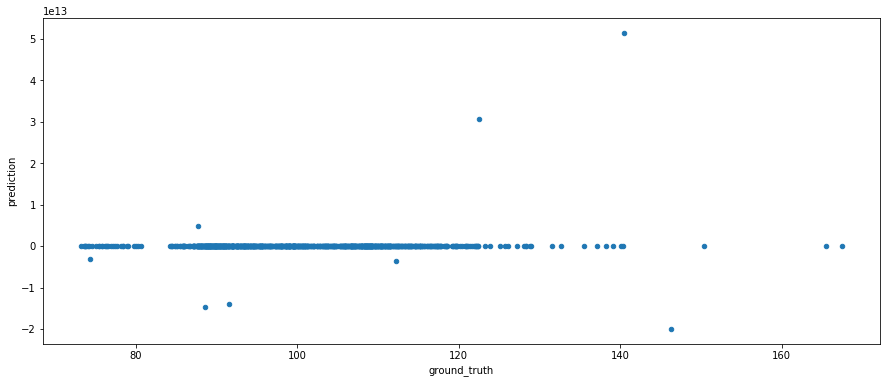

In [47]:
clf1 = LinearRegression(fit_intercept=True)
clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)

evaluate_result(y_test, y_pred)

## Ridge

MSE: 70.15056601707478
R2: 0.5295642912513849


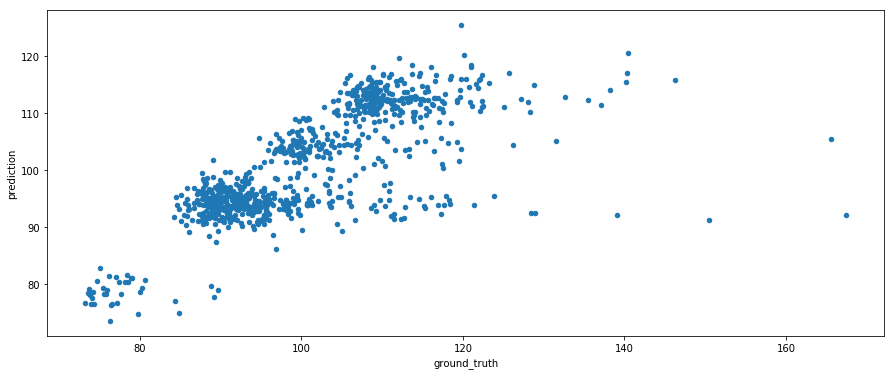

In [49]:
clf2 = RidgeCV(cv=5)
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)

evaluate_result(y_test, y_pred)

## Lasso

MSE: 67.51752147147049
R2: 0.5472217136687114


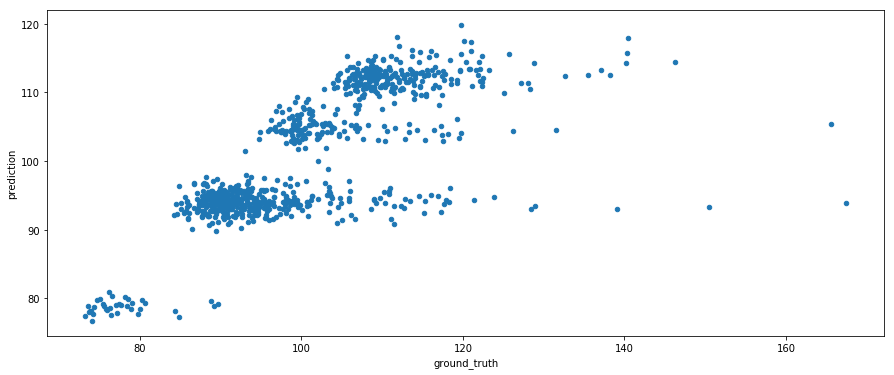

In [53]:
clf3 = LassoCV(cv=5, max_iter=5000,)
clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)

evaluate_result(y_test, y_pred)

## ElasticNet

MSE: 68.54475267412283
R2: 0.5403330131733963


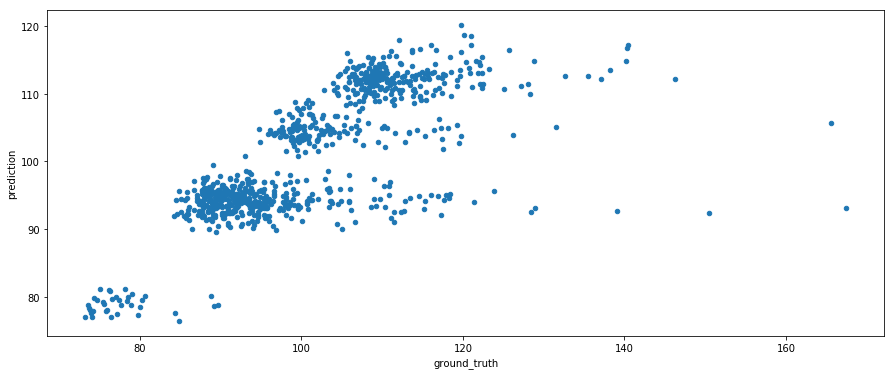

In [55]:
clf4 = ElasticNetCV(cv=5)
clf4.fit(x_train, y_train)
y_pred = clf4.predict(x_test)

evaluate_result(y_test, y_pred)

## Random Forest

MSE: 86.23919233771372
R2: 0.42167258408968966


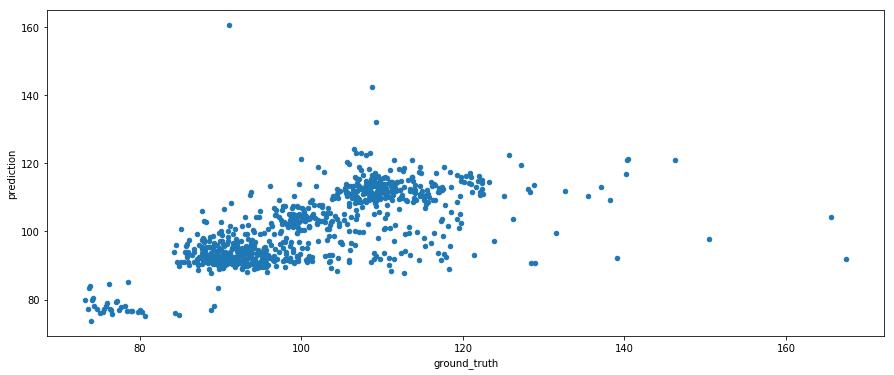

In [57]:
clf5 = RandomForestRegressor()
clf5.fit(x_train, y_train)
y_pred = clf5.predict(x_test)

evaluate_result(y_test, y_pred)

In [77]:
def search_thresh():
    ths = []
    mses = []
    for i in range(1, 100, 1):
        th = i/100
        clf3_1 = LassoCV(cv=5, max_iter=5000)
        sfm = SelectFromModel(clf3_1, threshold=0.5)
        sfm.fit(x_train, y_train)
        x_train2 = sfm.transform(x_train) 
#         print(x_train2.shape[1])
        x_test2 = sfm.transform(x_test)
#         print(x_test2.shape[1])

        clf5_1 = RandomForestRegressor()
        clf5_1.fit(x_train2, y_train)
        y_pred = clf5_1.predict(x_test2)

#         evaluate_result(y_test, y_pred)

        mse = mean_squared_error(y_test, y_pred)
        ths.append(th)
        mses.append(mse)
        print(i)
    return pd.DataFrame([ths, mses])

In [78]:
search_thresh()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,0.10000,...,0.900000,0.910000,0.920000,0.930000,0.940000,0.950000,0.960000,0.970000,0.98000,0.99000
1,82.640681,88.286471,90.795229,100.072965,89.647201,89.384688,100.611709,89.377197,89.662593,86.30177,...,86.570927,87.826957,91.864217,93.556815,86.449496,87.690292,85.611136,91.233224,101.84752,86.27777


In [76]:
pd.DataFrame([ths,mses])

NameError: name 'ths' is not defined